# Exploratory Data Analysis (EDA)

This notebook explores and summarizes the datasets:
- **Machine_Settings_Log_01.csv**
- **Production_Log_01.csv**

---

## 1. Imports and Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 2. Load the Data

In [3]:
# Update path if running elsewhere
machine = pd.read_csv('Machine_Settings_Log_01.csv')
production = pd.read_csv('Production_Log_01.csv')

print(f'Machine Settings shape: {machine.shape}')
print(f'Production Log shape: {production.shape}')

Machine Settings shape: (10000, 3)
Production Log shape: (10000, 20)


In [4]:
merged_df = pd.merge(machine, production, on='configuration_log_ID', how='inner')
merged_df.shape

(10000, 22)

In [5]:
merged_df_t = pd.merge(machine, production, on='configuration_log_ID', how='outer')
merged_df_t.shape

(10000, 22)

In [6]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  10000 non-null  int64  
 1   gear                  10000 non-null  int64  
 2   rotation_speed        10000 non-null  float64
 3   id                    10000 non-null  int64  
 4   width                 10000 non-null  float64
 5   height                10000 non-null  float64
 6   ionizationclass       10000 non-null  object 
 7   FluxCompensation      10000 non-null  object 
 8   pressure              10000 non-null  float64
 9   karma                 10000 non-null  float64
 10  modulation            10000 non-null  float64
 11  weight_in_kg          10000 non-null  float64
 12  weight_in_g           10000 non-null  float64
 13  error                 10000 non-null  object 
 14  error_type            3365 non-null   object 
 15  Quality             

,configuration_log_ID,gear,rotation_speed,id,width,height,ionizationclass,FluxCompensation,pressure,karma,...,weight_in_g,error,error_type,Quality,reflectionScore,distortion,nicesness,smartness,multideminsionality,roughness
0,1,2,122.121415,1,137.419169,44.326218,C,IV,103.937207,976.538993,...,8.370683e+08,no,NaN,95.489138,703.193051,49.666361,139.496837,2964.217002,no,123.202181
1,2,1,111.977476,2,98.706037,41.619531,A,II,101.177877,1031.806826,...,4.355043e+08,no,NaN,98.262642,663.936149,52.826310,100.380138,2733.298369,yes,111.040858
2,3,1,137.268544,3,117.262568,41.421088,A,III,99.381956,840.246668,...,5.995707e+08,no,NaN,98.472489,674.814037,51.967423,115.995772,2716.279965,no,138.439571
3,4,2,125.719071,4,122.657252,41.202308,A,I,101.833664,964.391122,...,6.498897e+08,no,NaN,97.107023,661.281569,47.626823,121.383895,2694.883523,no,125.939831
4,5,1,134.710713,5,118.085366,43.418485,C,I,95.246304,859.331870,...,6.054444e+08,no,NaN,92.994235,684.026152,47.420237,118.633440,2885.260257,no,135.123613


In [7]:
print(merged_df['error'].value_counts())

error
no     6635
yes    3365
Name: count, dtype: int64


In [8]:
# Show unique values to see what error types exist
print(merged_df['error_type'].unique())


[nan 'severe' 'minor' 'critical']


In [9]:
# Fill missing/empty error_type with a label (e.g., 'No Error')
merged_df['error_type'] = merged_df['error_type'].replace('', pd.NA)
merged_df['error_type'] = merged_df['error_type'].fillna('No Error')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   configuration_log_ID  10000 non-null  int64  
 1   gear                  10000 non-null  int64  
 2   rotation_speed        10000 non-null  float64
 3   id                    10000 non-null  int64  
 4   width                 10000 non-null  float64
 5   height                10000 non-null  float64
 6   ionizationclass       10000 non-null  object 
 7   FluxCompensation      10000 non-null  object 
 8   pressure              10000 non-null  float64
 9   karma                 10000 non-null  float64
 10  modulation            10000 non-null  float64
 11  weight_in_kg          10000 non-null  float64
 12  weight_in_g           10000 non-null  float64
 13  error                 10000 non-null  object 
 14  error_type            10000 non-null  object 
 15  Quality             

/var/folders/lj/36924lnj39380jwmbklmk4hh0000gn/T/ipykernel_18322/2333294152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=errors_df, x='error_type', palette='viridis')


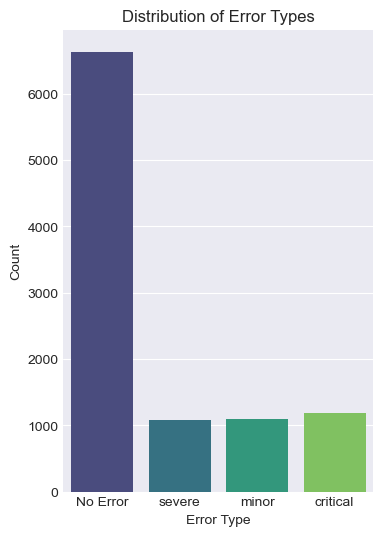

In [10]:
errors_df = merged_df[merged_df['error_type'].isin(['critical', 'severe', 'minor','No Error'])]
errors_df.shape
errors_df.info()
# Plotting the distribution of error types
plt.figure(figsize=(4, 6))
sns.countplot(data=errors_df, x='error_type', palette='viridis')
plt.title('Distribution of Error Types')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.show()

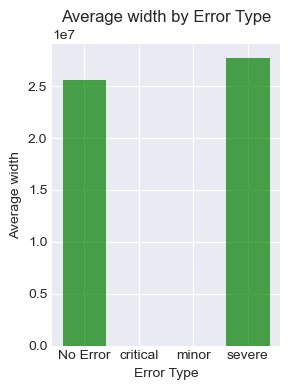

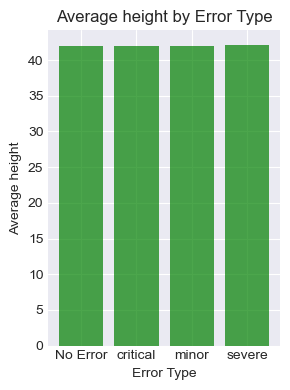

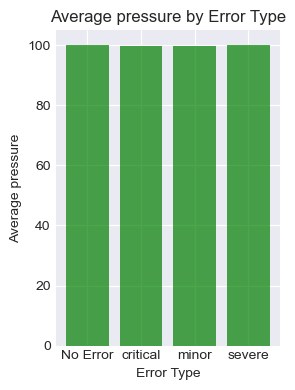

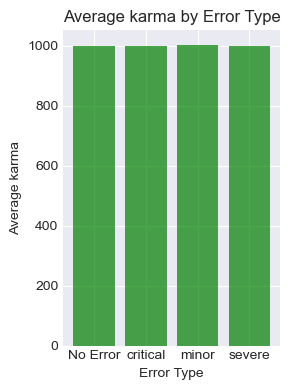

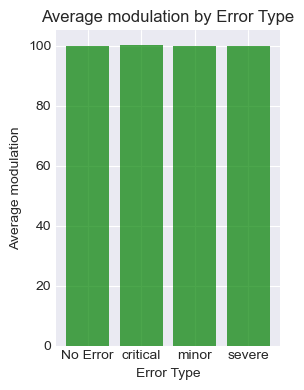

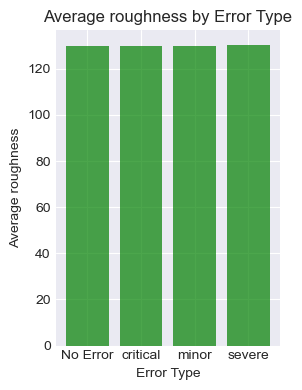

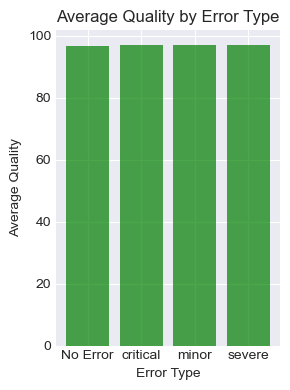

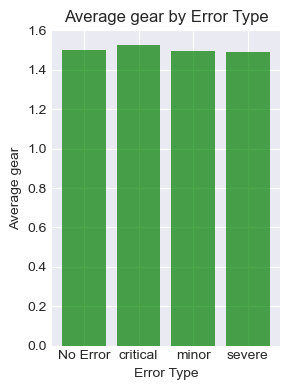

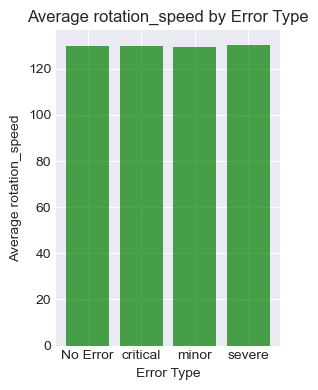

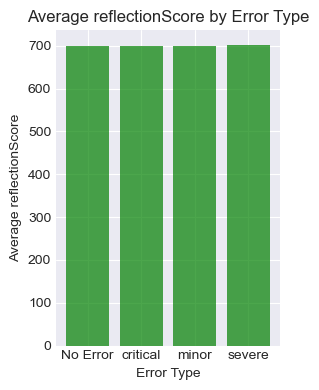

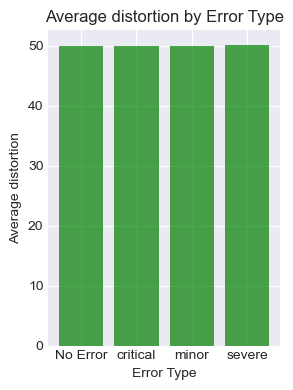

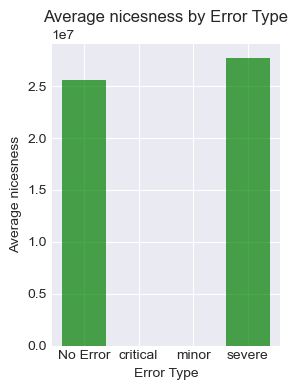

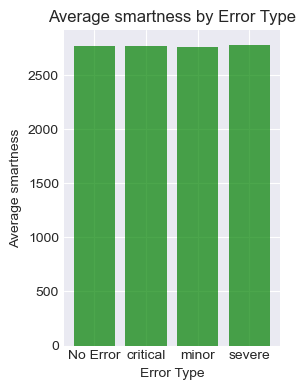

In [11]:
numeric_cols = ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness', 'Quality', 'gear', 'rotation_speed','reflectionScore', 'distortion','nicesness','smartness']

# Convert columns to numeric (ignore errors)
for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')


# Plot means by error type (including No Error)
for col in numeric_cols:
    plt.figure(figsize=(3, 4))
    means = merged_df.groupby('error_type')[col].mean().reset_index()
    plt.bar(means['error_type'], means[col], color='green', alpha=0.7)
    plt.title(f'Average {col} by Error Type')
    plt.xlabel('Error Type')
    plt.ylabel(f'Average {col}')
    plt.tight_layout()
    plt.show()


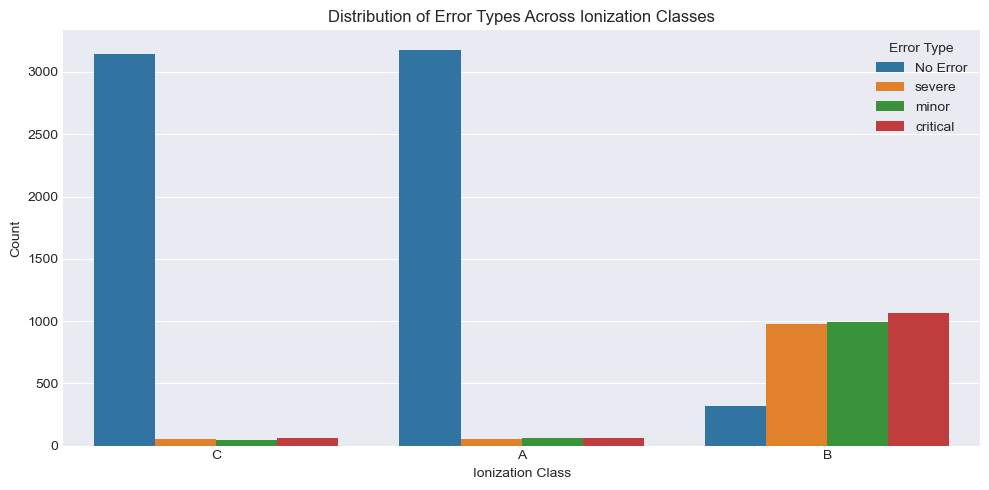

In [12]:

plt.figure(figsize=(10, 5))
sns.countplot(x='ionizationclass', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types Across Ionization Classes')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()


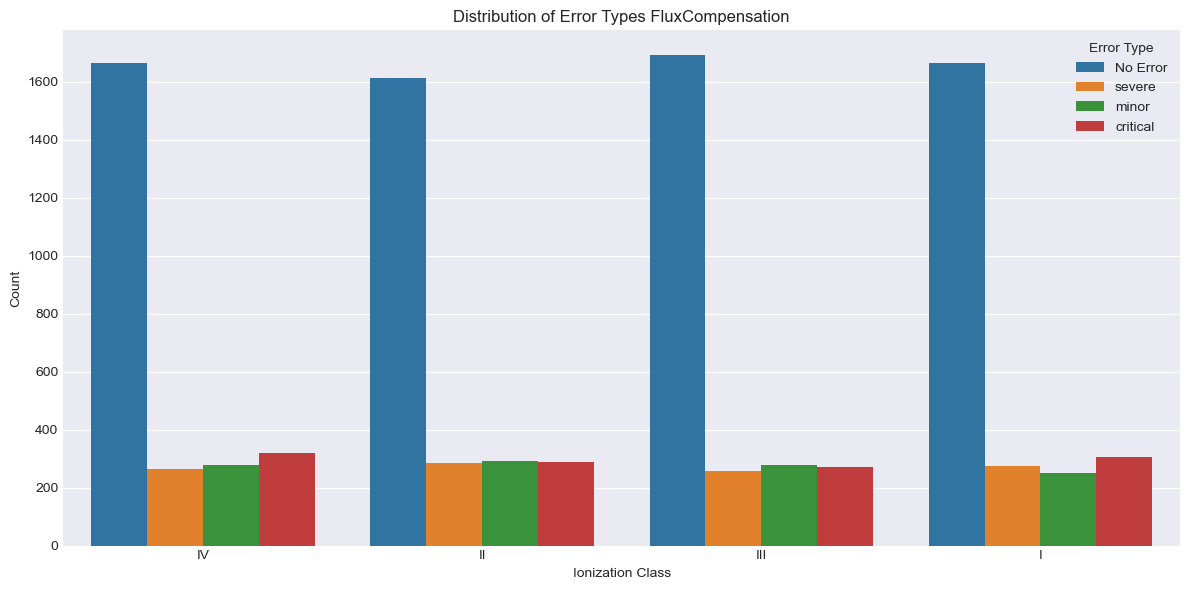

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='FluxCompensation', hue='error_type', data=merged_df)
plt.title('Distribution of Error Types FluxCompensation')
plt.xlabel('Ionization Class')
plt.ylabel('Count')
plt.legend(title='Error Type')
plt.tight_layout()
plt.show()

#### ML - Classification model - Random Forest Classifier 

In [14]:
from sklearn.preprocessing import LabelEncoder

# Copy your DataFrame to avoid changing the original, optional but safe
df_model = merged_df.copy()

# Handle missing values for categorical columns
df_model['ionizationclass'] = df_model['ionizationclass'].replace('', pd.NA).fillna('Unknown')
df_model['FluxCompensation'] = df_model['FluxCompensation'].replace('', pd.NA).fillna('Unknown')

# Label Encode both columns
for col in ['ionizationclass', 'FluxCompensation']:
    le_col = LabelEncoder()
    df_model[col] = le_col.fit_transform(df_model[col].astype(str))


In [15]:
features = ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness',
            'Quality', 'gear', 'rotation_speed', 'ionizationclass', 'FluxCompensation']
target = 'error_type'


In [16]:
for col in ['width', 'height', 'pressure', 'karma', 'modulation', 'roughness', 'Quality', 'gear', 'rotation_speed']:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')


In [17]:
df_model[target] = df_model[target].replace('', pd.NA).fillna('No Error')
df_model = df_model[features + [target]].dropna()


In [18]:
le_target = LabelEncoder()
df_model[target] = le_target.fit_transform(df_model[target])

X = df_model[features]
y = df_model[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

    No Error       0.94      0.95      0.95      1327
    critical       0.34      0.35      0.34       237
       minor       0.30      0.30      0.30       220
      severe       0.35      0.32      0.34       216

    accuracy                           0.74      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.74      0.74      0.74      2000



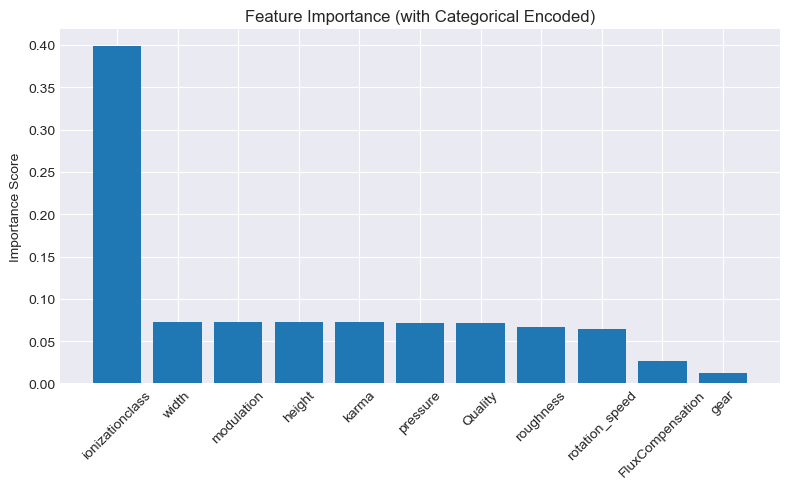

In [20]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = np.array(features)

plt.figure(figsize=(8, 5))
plt.title("Feature Importance (with Categorical Encoded)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


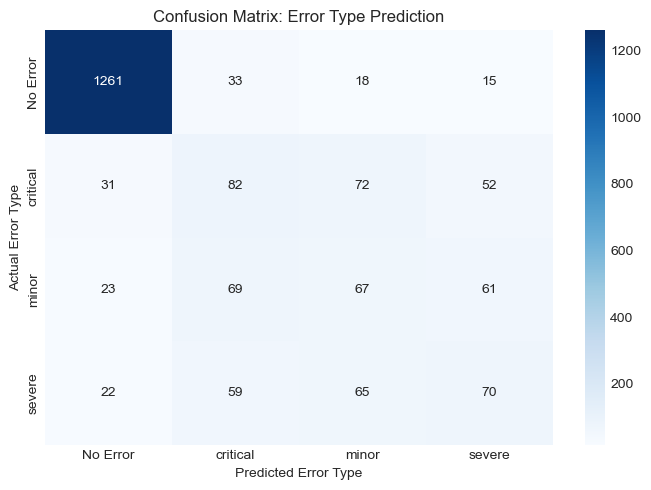

In [21]:
from sklearn.metrics import confusion_matrix
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot with seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=le_target.classes_, 
    yticklabels=le_target.classes_
)
plt.xlabel('Predicted Error Type')
plt.ylabel('Actual Error Type')
plt.title('Confusion Matrix: Error Type Prediction')
plt.tight_layout()
plt.show()


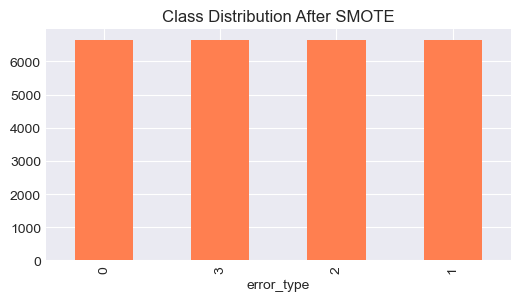

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.0s
[CV] END ma

In [24]:
# 1. SMOTE for class balancing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Assume df_model, features, target, and le_target (LabelEncoder) are already defined

X = df_model[features]
y = df_model[target]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Optional: See new class distribution
pd.Series(y_res).value_counts().plot(kind='bar', color='coral', figsize=(6,3))
plt.title('Class Distribution After SMOTE')
plt.show()

# 2. GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'
)

grid_search.fit(X_res, y_res)

print("Best parameters:", grid_search.best_params_)

# 3. Retrain and evaluate on balanced, tuned data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


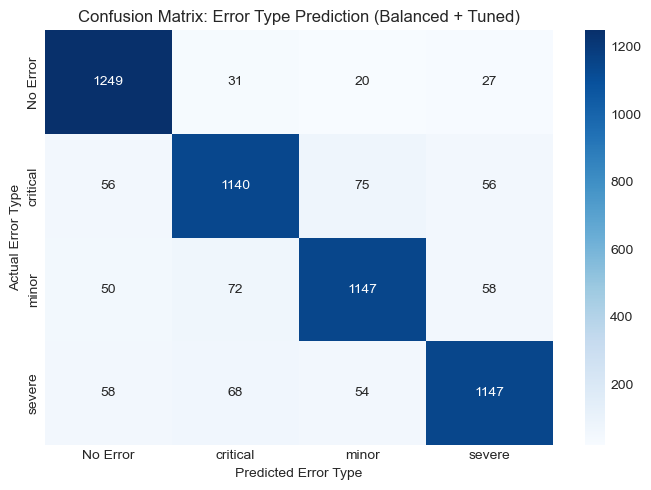

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le_target.classes_,
    yticklabels=le_target.classes_
)
plt.xlabel('Predicted Error Type')
plt.ylabel('Actual Error Type')
plt.title('Confusion Matrix: Error Type Prediction (Balanced + Tuned)')
plt.tight_layout()
plt.show()


#### XGBoost Classifier

In [26]:
!pip install xgboost


In [27]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# X_res, y_res are your features and target after SMOTE and encoding
# le_target is your LabelEncoder for 'error_type'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Train XGBoost Classifier
xgb_clf = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',    # For multiclass classification
    random_state=42
)
xgb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:18:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1745056743506/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

    No Error       0.85      0.93      0.89      1327
    critical       0.73      0.70      0.72      1327
       minor       0.72      0.69      0.71      1327
      severe       0.73      0.72      0.72      1327

    accuracy                           0.76      5308
   macro avg       0.76      0.76      0.76      5308
weighted avg       0.76      0.76      0.76      5308



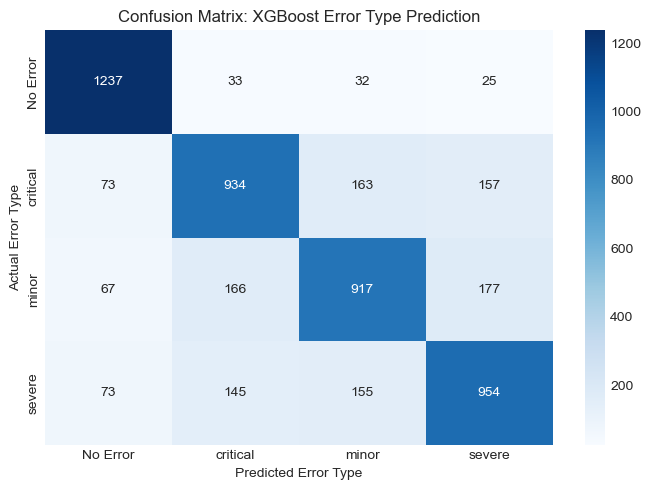

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have le_target.classes_, y_test, y_pred
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=le_target.classes_, 
    yticklabels=le_target.classes_
)
plt.xlabel('Predicted Error Type')
plt.ylabel('Actual Error Type')
plt.title('Confusion Matrix: XGBoost Error Type Prediction')
plt.tight_layout()
plt.show()


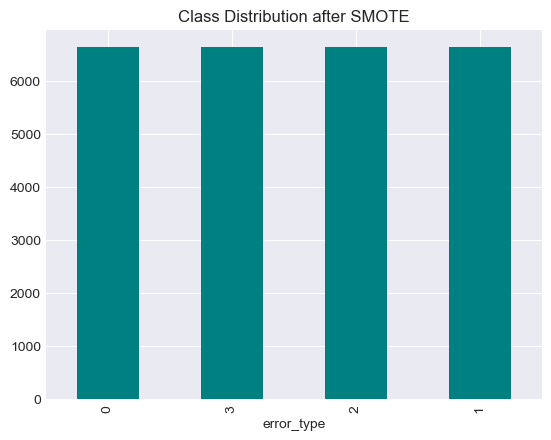

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:25:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1745056743506/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

    No Error       0.85      0.93      0.89      1327
    critical       0.73      0.70      0.72      1327
       minor       0.72      0.69      0.71      1327
      severe       0.73      0.72      0.72      1327

    accuracy                           0.76      5308
   macro avg       0.76      0.76      0.76      5308
weighted avg       0.76      0.76      0.76      5308



In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# 1. Prepare features and target
X = df_model[features]
y = df_model[target]

# 2. Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# (Optional) Show new class distribution
import matplotlib.pyplot as plt
import pandas as pd
pd.Series(y_res).value_counts().plot(kind='bar', color='teal')
plt.title('Class Distribution after SMOTE')
plt.show()

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# 4. Train XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',    # For multiclass classification
    random_state=42
)
xgb_clf.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


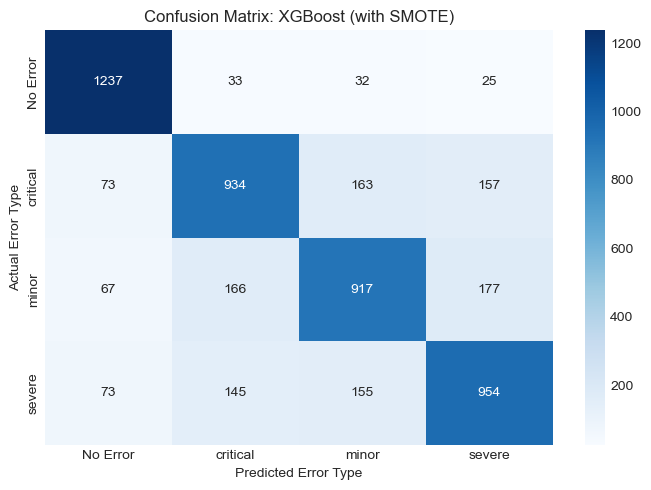

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=le_target.classes_, 
    yticklabels=le_target.classes_
)
plt.xlabel('Predicted Error Type')
plt.ylabel('Actual Error Type')
plt.title('Confusion Matrix: XGBoost (with SMOTE)')
plt.tight_layout()
plt.show()


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le_target.classes_))


              precision    recall  f1-score   support

    No Error       0.85      0.93      0.89      1327
    critical       0.73      0.70      0.72      1327
       minor       0.72      0.69      0.71      1327
      severe       0.73      0.72      0.72      1327

    accuracy                           0.76      5308
   macro avg       0.76      0.76      0.76      5308
weighted avg       0.76      0.76      0.76      5308



In [32]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights for balanced learning
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_clf = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_clf.fit(X_train, y_train, sample_weight=sample_weights)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:31:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1745056743506/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)